In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### 엑셀파일

In [2]:
df = pd.read_excel("./data/시도별 전출입 인구수.xlsx", engine='openpyxl')

In [3]:
df.shape

(325, 50)

In [4]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [5]:
df.isnull().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

### 결측치 처리

In [6]:
df.dropna().shape

(19, 50)

In [7]:
help(df.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value: 'object | ArrayLike | None' = None, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit=None, downcast=None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
  

In [8]:
df = df.fillna(method='ffill')
#df.fillna(method='ffill', inplace=True)

### 데이터 추출

In [9]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

In [10]:
df[mask].shape

(17, 50)

In [11]:
df_seoul = df[mask]

In [12]:
# 전출지별 삭제 
df_seoul = df_seoul.drop(['전출지별'], axis=1)

In [13]:
# 전입지별 -> 전입지 
df_seoul.rename(columns={"전입지별" : "전입지"}, inplace=True)

In [14]:
df_seoul.set_index("전입지", inplace=True)

In [15]:
sr_one = df_seoul.loc['경기도']

### 시각화

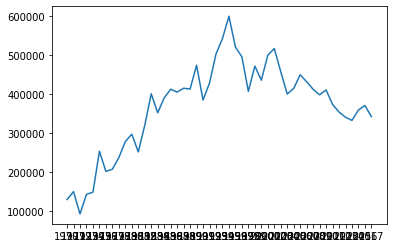

In [16]:
plt.plot(sr_one.index, sr_one.values)
plt.show()

### 한글 폰트 설정 

In [33]:
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### 한글이 포함된 제목 출력하기 

In [18]:
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

In [21]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    sele

In [27]:
# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [40]:
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [44]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    Set a title for the Axes.
    
    Set one of the three available Axes titles. The available titles
    are positioned above the Axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :rc:`axes.titley`
        Vertical Axes loation for the title (1.0 i

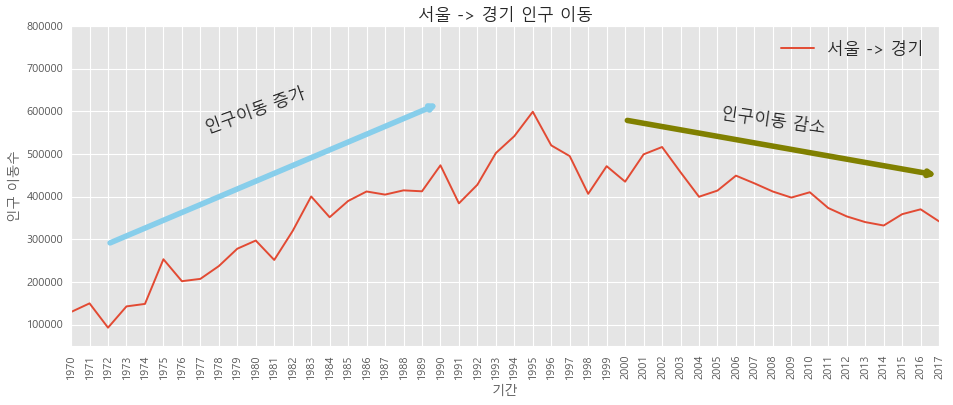

In [75]:
# 스타일 
plt.style.use('ggplot')
# 그림 크기 
plt.figure(figsize=(14,5))
# x 축의 각도 
plt.xticks(rotation=90)
plt.title("서울 -> 경기 인구 이동", fontdict ={'fontsize': 15})

# x축이름 추가 
plt.xlabel("기간")
# y축 인구 이동수
plt.ylabel("인구 이동수")
plt.plot(sr_one)
# legend 
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
# 축의 범위 지정 -> ylim, xlim 
plt.ylim(50000,800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )
plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )
plt.annotate("인구이동 증가",
             xy=(10, 550000), 
             rotation=20,
             va='baseline', # 텍스트 상하 정렬 
             ha='center',   # 텍스트 좌우 정렬 
             fontsize=15
            )
plt.annotate("인구이동 감소", 
             xy = (38, 550000),
             rotation = -8,
             va = 'baseline', # 텍스트 상하 정렬
             ha='center',  # 텍스트 좌우 정렬
             fontsize=15)
plt.show()

### 시각화 2

dir(ax1)

In [103]:
import warnings
warnings.filterwarnings(action='ignore')

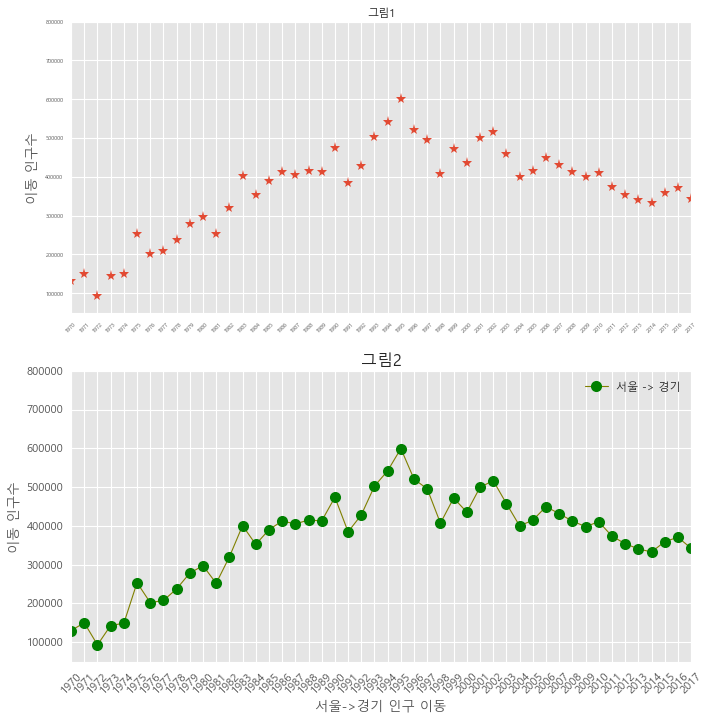

In [117]:
# 그래프 객체 생성 
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_title("그림1", size=10)
ax2.set_title("그림2")
ax1.plot(sr_one, '*', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, 
         color='olive', linewidth=1, label='서울 -> 경기')
ax2.legend(loc='best')


ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)
ax1.set_ylabel("이동 인구수")
ax2.set_ylabel("이동 인구수")
ax2.set_xlabel("서울->경기 인구 이동")

ax1.set_xticklabels(sr_one.index, rotation=45)
ax2.set_xticklabels(sr_one.index, rotation=45)
# 축의 라벨 크기 변경 
ax1.tick_params(axis='x', labelsize=5)
ax1.tick_params(axis='y', labelsize=5)
plt.show()

### 두번째 데이터

* map <- 파이썬 기본 함수

In [120]:
str(10)

'10'

In [125]:
list(map(int, ['1', '2', '3']))

[1, 2, 3]

[str(x) for x in range(1, 100)]

list(map(str, list(range(1,100))))

In [137]:
col_year = list(map(str,range(1970,2018)))

In [140]:
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_year].copy()

df_seoul.loc[['충청남도', '경상북도', '강원도'], '1970':'2017']

In [144]:
tmp = pd.DataFrame({'a' : range(1,10), 'b' : range(11,20)})

In [145]:
tmp2 = tmp

In [147]:
tmp2.iloc[0,0]  = 99

In [149]:
tmp2.head(2)

,a,b
0,99,11
1,2,12


In [197]:
import warnings
warnings.filterwarnings(action='ignore')

help(warnings.filterwarnings)

In [153]:
tmp2['c'] = tmp2['a'] * 10

In [154]:
tmp

,a,b,c
0,99,11,990
1,2,12,20
2,3,13,30
3,4,14,40
4,5,15,50
5,6,16,60
6,7,17,70
7,8,18,80
8,9,19,90


In [155]:
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


### 하나의 그림에 여러 데이터로 그리기 

In [165]:
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [169]:
df_3.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

col_year

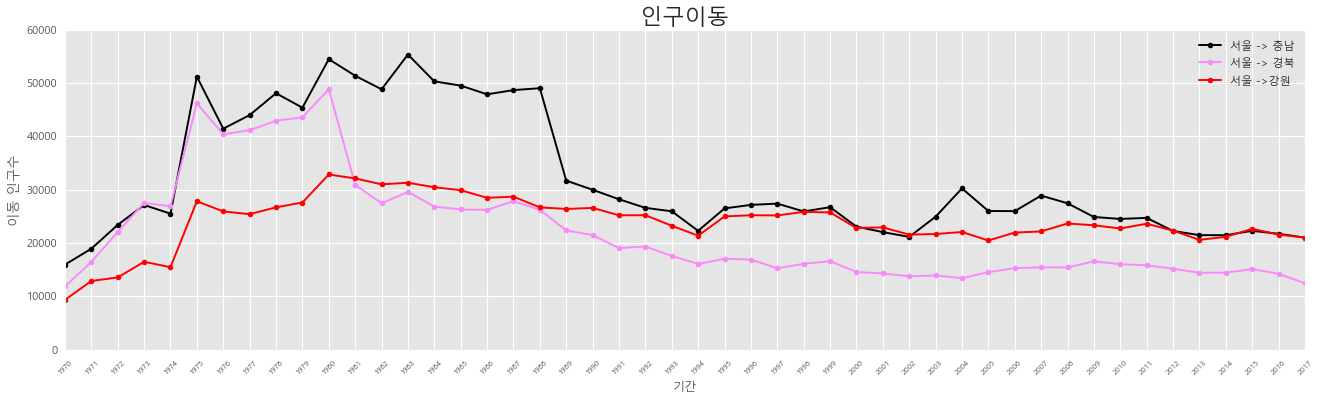

In [198]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)


ax.plot(col_year, df_3.loc['충청남도'], marker='o', markersize=5, color="#000000", label='서울 -> 충남')
ax.plot(df_3.columns, df_3.loc['경상북도'],  marker='o', markersize=5, color="#F98BF9", label='서울 -> 경북')
ax.plot(df_3.columns, df_3.loc['강원도'],  marker='o',markersize=5, color='red', label = '서울 ->강원')

ax.legend(loc='best')

ax.set_title("인구이동", size=20)

ax.set_xlabel("기간", size=11)
ax.set_ylabel("이동 인구수", size=12)

ax.tick_params(axis='x', labelsize=7)
ax.set_xticklabels(col_year, rotation=45)
plt.show()